# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
!pip install citipy


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

# List of city data
city_info = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
#         time.sleep(10)

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        city_max_temp = city_weather["main"]["max_temp"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        
        

        # Append the City information into city_data list
        city_info.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | namibe
Processing Record 2 of Set 1 | chokurdakh
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | katsuura
Processing Record 6 of Set 1 | koslan
Processing Record 7 of Set 1 | port macquarie
Processing Record 8 of Set 1 | sitka
Processing Record 9 of Set 1 | houma
Processing Record 10 of Set 1 | roma
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | hasaki
Processing Record 14 of Set 1 | camana
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | tura
Processing Record 17 of Set 1 | florianopolis
Processing Record 18 of Set 1 | mrirt
City not found. Skipping...
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | ribeira grande
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of Set 1 | stromness


In [9]:
city_weather

{'coord': {'lon': 171.2132, 'lat': -44.4871},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 51.19,
  'feels_like': 50.47,
  'temp_min': 51.19,
  'temp_max': 51.19,
  'pressure': 1022,
  'humidity': 95,
  'sea_level': 1022,
  'grnd_level': 1020},
 'visibility': 10000,
 'wind': {'speed': 1.9, 'deg': 265, 'gust': 2.04},
 'clouds': {'all': 100},
 'dt': 1623026431,
 'sys': {'type': 2,
  'id': 20853,
  'country': 'NZ',
  'sunrise': 1623009945,
  'sunset': 1623042145},
 'timezone': 43200,
 'id': 2181133,
 'name': 'Pareora',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
city_info.to_csv(output_data_file, index_label="City_ID")

In [19]:
city_info= pd.DataFrame(city_info)

In [20]:
city_info.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [21]:
city_info.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,namibe,-15.1961,12.1522,75.29,44,0,10.22,AO,1623026179
1,chokurdakh,70.6333,147.9167,41.27,60,76,5.68,RU,1623026179
2,mataura,-46.1927,168.8643,49.48,65,0,3.78,NZ,1623026180
3,cape town,-33.9258,18.4232,68.00,34,0,16.11,ZA,1623025899
4,katsuura,35.1333,140.3000,73.42,85,94,2.64,JP,1623026180


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [22]:
city_info.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,5.540000e+02
mean,18.868981,19.490615,65.954639,69.043321,52.274368,7.732292,1.623026e+09
std,34.195568,89.296641,14.914586,20.514669,40.484996,5.230242,9.964557e+01
min,-54.800000,-175.200000,27.790000,7.000000,0.000000,0.000000,1.623026e+09
25%,-9.766450,-58.641825,54.992500,57.250000,8.000000,3.605000,1.623026e+09
50%,20.424450,24.580350,66.830000,73.000000,54.000000,6.670000,1.623026e+09
75%,49.195750,96.111375,78.137500,85.000000,98.000000,10.527500,1.623026e+09
max,78.218600,178.416700,102.670000,100.000000,100.000000,27.690000,1.623026e+09


In [23]:
#  Get the indices of cities that have humidity over 100%.
dirty_city = city_info[(city_info["Humidity"] > 100)].index
                                  
dirty_city

Int64Index([], dtype='int64')

In [15]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city = city_info.drop(dirty_city, inplace=False)
clean_city.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,namibe,-15.1961,12.1522,75.29,44,0,10.22,AO,1623026179
1,chokurdakh,70.6333,147.9167,41.27,60,76,5.68,RU,1623026179
2,mataura,-46.1927,168.8643,49.48,65,0,3.78,NZ,1623026180
3,cape town,-33.9258,18.4232,68.00,34,0,16.11,ZA,1623025899
4,katsuura,35.1333,140.3000,73.42,85,94,2.64,JP,1623026180


In [25]:
# Extract relevant fields from the data frame
lats = clean_city["Lat"]
max_temps = clean_city["Max Temp"]
humidity = clean_city["Humidity"]
cloudiness = clean_city["Cloudiness"]
wind_speed = clean_city["Wind Speed"]

# Export the City_Data into a csv
clean_city.to_csv(output_data_file, index_label="City_ID")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

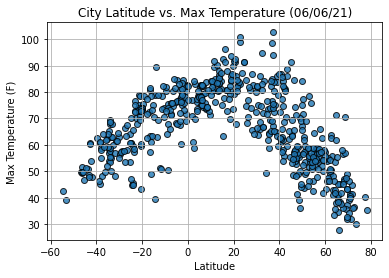

In [28]:
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

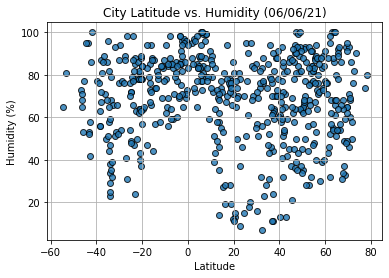

In [32]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities" )

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

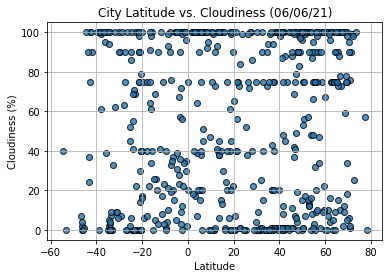

In [33]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

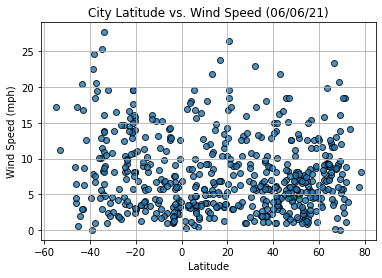

In [34]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()